# Movie Recommendation Using on Content Based Filtering

#### Stages
1. data analysis.
2. recommend movies

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading the data

In [2]:
#Reading users file:
u_cols = ['user_id','age','sex','occupation','zip_code']
users = pd.read_csv('data/u.user', sep='|', names=u_cols, usecols=range(5), encoding='latin-1')
#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating','timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names=r_cols, usecols=range(4), encoding='latin-1')
#Reading movies file:
m_cols = ['movie_id', 'title','release_date','v_release']
movies = pd.read_csv('data/u.item', sep='|', names=m_cols, usecols=range(4), encoding='latin-1')

movrate = pd.merge(movies,ratings)
data = pd.merge(movrate,users)

In [3]:
data.head()

,movie_id,title,release_date,v_release,user_id,rating,timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,308,5,887736696,60,M,retired,95076


# 1. Analyse the data

##### show the data to be used

In [46]:
data

,movie_id,title,release_date,v_release,user_id,rating,timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,308,4,887739056,60,M,retired,95076


#### 20 Most rated movies
movies that have been watched and rated by users

In [26]:
most_watched = data.title.value_counts()[:20]
most_watched

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

Text(0, 0.5, 'Number of ratings')

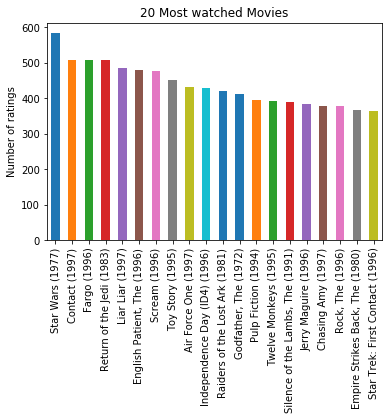

In [27]:
most_watched.plot.bar()
plt.title("20 Most watched Movies")
plt.ylabel('Number of ratings')

figure above is showing the 20 most watched and rated movies by most users. Star wars had the highest number of ratings whilst the least one is Star Trek: First Contact.

#### Age which frequently watches movies
Here we are analysing the age group which watches movies the most.

In [28]:
#frequency in age range
#data['age']
data.age.value_counts()

27    6423
24    4556
20    4089
25    4013
22    3979
30    3762
29    3650
28    3619
32    3526
19    3514
26    3503
35    3363
21    3020
33    2939
31    2757
23    2683
39    2610
36    2476
51    2232
18    2219
44    2135
50    2066
38    1883
40    1841
48    1725
42    1699
47    1614
60    1609
49    1556
43    1480
      ... 
37    1128
46    1069
57    1003
41     976
45     926
17     897
53     749
56     708
55     644
52     629
13     497
15     397
58     367
16     335
61     282
14     264
65     229
54     214
69     156
70     141
64      95
68      92
59      92
63      77
73      56
62      46
7       43
66      37
10      31
11      27
Name: age, Length: 61, dtype: int64

Text(0.5, 1.0, 'Age Frequency')

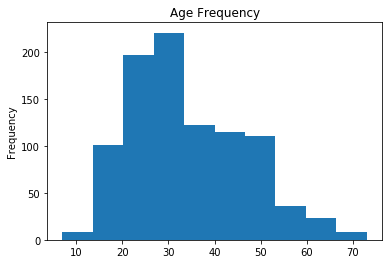

In [29]:
users.age.plot.hist()
plt.title("Age Frequency")

figure above is showing that the age group in the late twenties and early thirties have the highest frequency of watching movies.

### Movie ratings
how the movies are rated

In [22]:
movie_stats = data.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()
#movie_stats[:30]

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [58]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False)[:30]
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:30]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       367  4.204360
Boot, Das (1981)                                      201  4.203980
Sling Blade (1996)                                    136  4.198529
As Good As It Gets (1997)                             112  4.196429
Godfather: Part II, The (1974)                        209  4.186603
African Queen, The (1951)                             152  4.184211

### Movies ratings by gender
how movies are rated by gender

In [76]:
gender_rate = data.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
gender_rate[:30]

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429
7,Twelve Monkeys (1995),3.560976,3.861290
8,Babe (1995),4.050000,3.974843
9,Dead Man Walking (1995),3.927711,3.884259


# 2. Recommendation
recommendation by Age and Gender using Movie ratings as target variable.

### by Age
recommend system using age

In [7]:
def reco_age():
    uage = int(input("\nEnter User Age... \t"))
    
    userage = data[data['age']== uage]
    top = userage[userage['rating'] == 5]

    topr = top.drop('movie_id',1)
    topec = topr.drop('user_id',1)
    toprecom = topec.drop('rating',1)

    #create list of movies...
    lst = []
    for item in toprecom['title'][:7]:
        lst.append(item)

    #print the movies
    print("\n\n\tMOVIES YOU MAY LIKE..\n")
    for movi in lst:
          print(movi)

In [32]:
reco_age()


Enter User Age... 	60


	MOVIES YOU MAY LIKE..

Get Shorty (1995)
Babe (1995)
Seven (Se7en) (1995)
Usual Suspects, The (1995)
Taxi Driver (1976)
Crumb (1994)
Star Wars (1977)


## By Gender
recommend by gender

In [35]:
def reco_gen():
    uge = input("\nEnter User Gender (M\F)... \t")
    #print(uge)
    
    gend = data[data['sex'] == uge]
    top = gend[gend['rating'] == 5]

    topr = top.drop('movie_id',1)
    topec = topr.drop('user_id',1)
    toprecom = topec.drop('rating',1)

    #create list of movies...
    lst = []
    for item in toprecom['title'][:7]:
        lst.append(item)

    #print the movies
    print("\n\n\tMOVIES YOU MAY LIKE..\n")
    for movi in lst:
          print(movi)

In [36]:
reco_gen()


Enter User Gender (M\F)... 	F


	MOVIES YOU MAY LIKE..

Babe (1995)
Dead Man Walking (1995)
Seven (Se7en) (1995)
Usual Suspects, The (1995)
Mighty Aphrodite (1995)
Braveheart (1995)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)


## Recom

In [39]:
def hybrid():
    gen = input("Whats your gender..\t")
    ag = int(input("Whats your age..\t"))
    
    gend = data[data['sex'] == gen]
    top = gend[gend['rating'] == 5]
    toper = top[top['age']== ag]
    
    topr = toper.drop('movie_id',1)
    topec = topr.drop('user_id',1)
    toprecom = topec.drop('rating',1)
    
    #create list of movies...
    lst = []
    for item in toprecom['title'][:7]:
        lst.append(item)
        
    #print the movies
    print("\n\n\tMOVIES YOU MAY LIKE..\n")
    for movi in lst:
          print(movi)
    

In [40]:
hybrid()

Whats your gender..	M
Whats your age..	32


	MOVIES YOU MAY LIKE..

Toy Story (1995)
Get Shorty (1995)
Babe (1995)
Richard III (1995)
Postino, Il (1994)
Angels and Insects (1995)
Star Wars (1977)


In [41]:
hybrid()

Whats your gender..	F
Whats your age..	32


	MOVIES YOU MAY LIKE..

GoldenEye (1995)
Get Shorty (1995)
Babe (1995)
Usual Suspects, The (1995)
Net, The (1995)
Star Wars (1977)
Pulp Fiction (1994)


# Conclusion